# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/RabbitChallenge/深層学習Day1')

# importと関数定義

In [3]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# 確率勾配降下法

In [6]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    # z1 = functions.relu(u1)
    
    ## 試してみよう
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層における平均二乗誤差の導関数
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ（ReLU or Sigmoid）
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)



##### 結果表示 #####


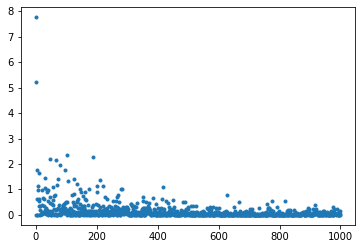

In [7]:
print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

In [8]:
# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])

In [13]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 2 * x[0] + 3 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 5
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()
    return network

# 順伝播
def forward(network, x):    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.sigmoid(u1)
    u2 = np.dot(z1, W2) + b2
    y = u2
    return z1, y

# 順伝播（活性化関数をReLUにする）
def forward2(network, x):    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = u2
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y): 
    grad = {}
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 出力層における平均二乗誤差の導関数
    delta2 = functions.d_mean_squared_error(d, y)
    # 中間層〜出力層の勾配の計算
    grad['b2'] = np.sum(delta2, axis=0)
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層における平均二乗誤差の導関数(ReLU or Sigmoid)
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)
    delta1 = delta1[np.newaxis, :]
    # 入力層〜中間層の勾配の計算
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    grad['W1'] = np.dot(x.T, delta1)
    return grad

# 誤差逆伝播(中間層における平均二乗誤差の導関数をReluに)
def backward2(x, d, z1, y): 
    grad = {}
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    delta2 = functions.d_mean_squared_error(d, y)
    grad['b2'] = np.sum(delta2, axis=0)
    grad['W2'] = np.dot(z1.T, delta2)
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    delta1 = delta1[np.newaxis, :]
    # 入力層〜中間層の勾配の計算
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    grad['W1'] = np.dot(x.T, delta1)
    return grad

In [16]:
# 1 
losses = []
# 学習率
learning_rate = 0.07
# 抽出数
epoch = 1000
# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]
    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)


##### 結果表示 #####


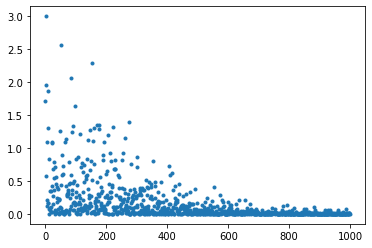

In [12]:
print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

In [17]:
# 2 
losses = []
# 学習率
learning_rate = 0.07
# 抽出数
epoch = 1000
# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward2(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]
    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)


##### 結果表示 #####


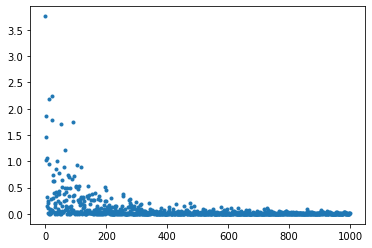

In [18]:
print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

In [19]:
# 3
losses = []
# 学習率
learning_rate = 0.07
# 抽出数
epoch = 1000
# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward2(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]
    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)


##### 結果表示 #####


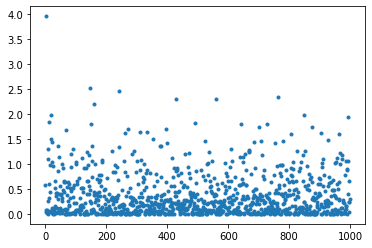

In [20]:
print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

In [21]:
# 4
losses = []
# 学習率
learning_rate = 0.07
# 抽出数
epoch = 1000
# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward2(network, x)
    grad = backward2(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]
    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

##### 結果表示 #####


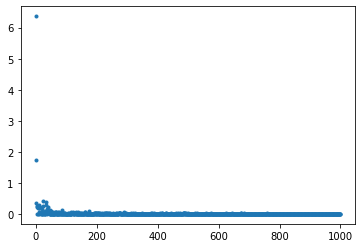

In [22]:
print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()